## Consumer Complaints Analysis Using BERT

## Data Loading

In [1]:
!kaggle datasets download -d shashwatwork/consume-complaints-dataset-fo-nlp

Dataset URL: https://www.kaggle.com/datasets/shashwatwork/consume-complaints-dataset-fo-nlp
License(s): copyright-authors
consume-complaints-dataset-fo-nlp.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/content/consume-complaints-dataset-fo-nlp.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('complaints_processed.csv')

In [ ]:
df.head(5)

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [ ]:
df.shape

(162421, 3)

In [ ]:
df.size

487263

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,162421.0,81210.0,46887.048373,0.0,40605.0,81210.0,121815.0,162420.0


In [ ]:
df.isnull().sum()

Unnamed: 0     0
product        0
narrative     10
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

Unnamed: 0    162421
product            5
narrative     124472
dtype: int64

In [ ]:
unique_product = df['product'].unique()
print(unique_product)

['credit_card' 'retail_banking' 'credit_reporting' 'mortgages_and_loans'
 'debt_collection']


## Data Visualization

In [ ]:
# Creating a duplicate dataframe for data visualization

df_dv = df.copy()

In [ ]:
# Renaming the column name and labeling the Complaints

df_dv.rename(columns={'narrative': 'Text', 'product': 'Label'}, inplace=True)

df_dv['Label'] = df_dv['Label'].replace({
    0: 'credit_card',
    1: 'retail_banking',
    2: 'credit_reporting',
    3: 'mortgages_and_loans',
    4: 'Fedebt_collectionar',
})

df_dv.drop('Unnamed: 0',axis=1,inplace=True)
df_dv.dropna(inplace=True)

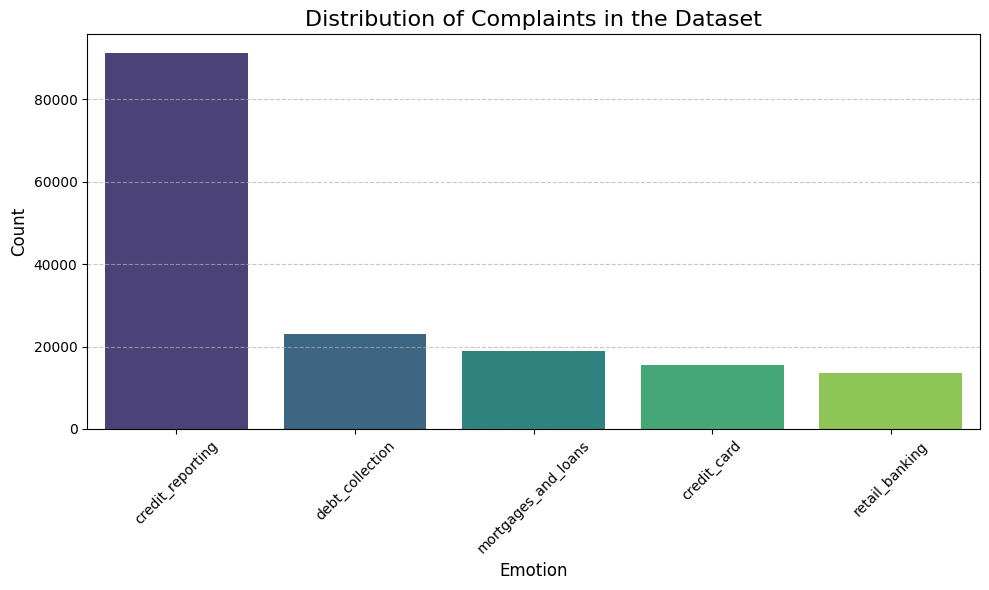

In [ ]:
# Visualizing Distribution of Complaints

label_counts = df_dv['Label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Complaints in the Dataset', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

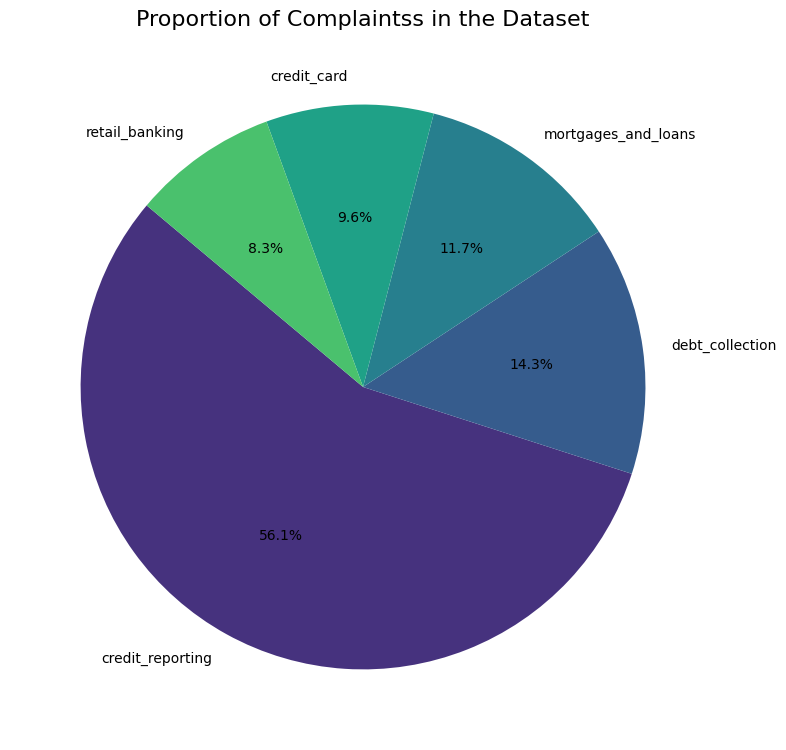

In [ ]:
# Visualizing Complaints Distribution

plt.figure(figsize=(8, 8))

df_dv['Label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Proportion of Complaintss in the Dataset', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()

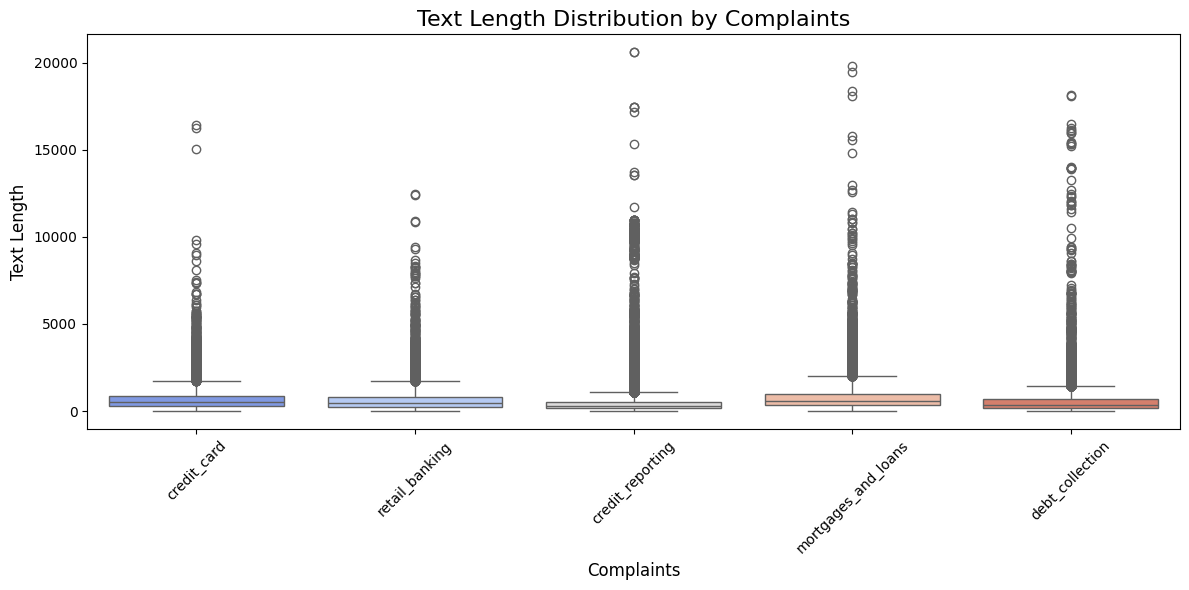

In [ ]:
# Representing Text Length Distribution by Complaints

df_dv['Text_Length'] = df_dv['Text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Text_Length', data=df_dv, palette='coolwarm')
plt.title('Text Length Distribution by Complaints', fontsize=16)
plt.xlabel('Complaints', fontsize=12)
plt.ylabel('Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

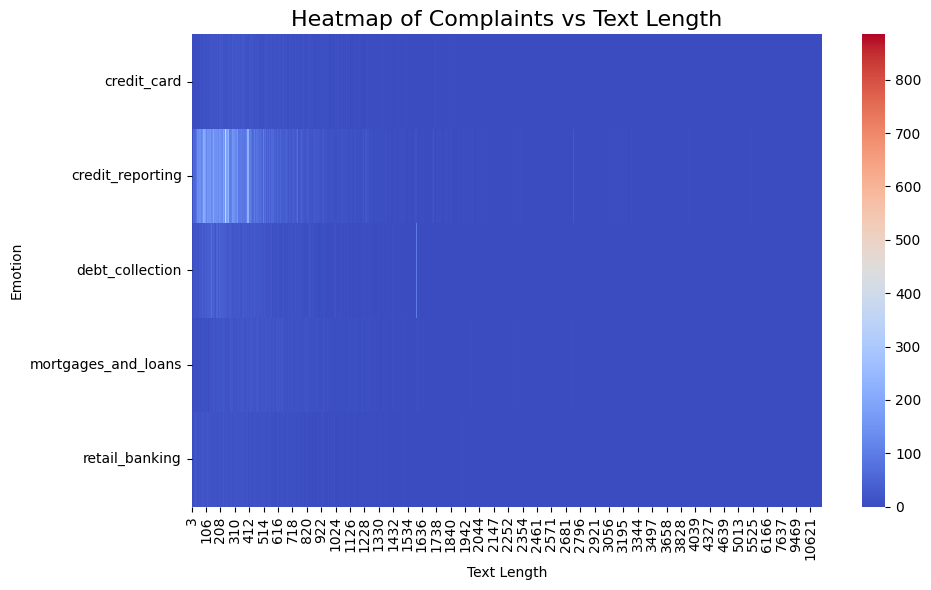

In [ ]:
# Heatmap for Complaints Correlation

emotion_pivot = pd.crosstab(df_dv['Label'], df_dv['Text_Length'])

plt.figure(figsize=(10, 6))
sns.heatmap(emotion_pivot, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Complaints vs Text Length', fontsize=16)
plt.xlabel('Text Length')
plt.ylabel('Emotion')
plt.tight_layout()
plt.show()

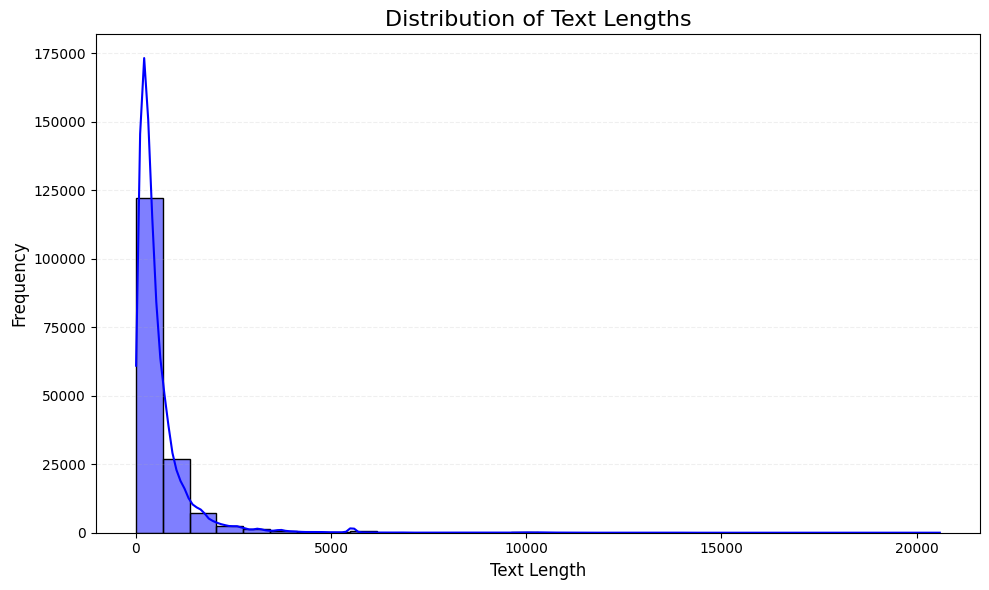

In [ ]:
# Plotting Histogram for Distributon of Text Lengths

plt.figure(figsize=(10, 6))
df_dv['Text_Length'] = df_dv['Text'].apply(len)
sns.histplot(df_dv['Text_Length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Lengths', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

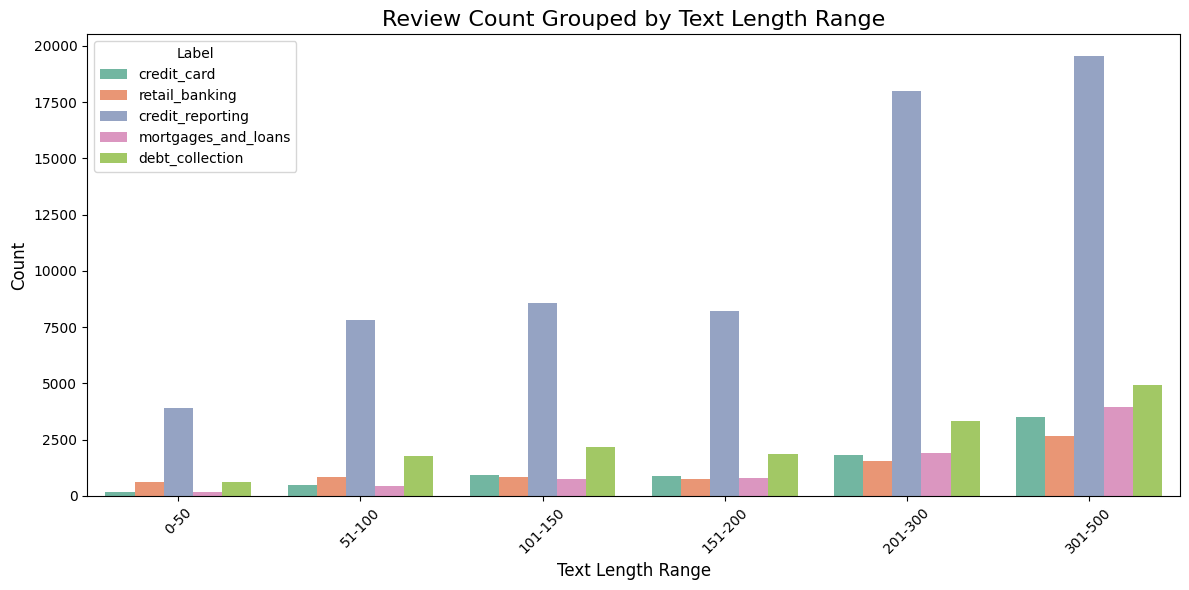

In [ ]:
# Visualizing Review Count Grouped by Text Length Range

df_dv['Length_Bin'] = pd.cut(df_dv['Text_Length'], bins=[0, 50, 100, 150, 200, 300, 500],
                          labels=['0-50', '51-100', '101-150', '151-200', '201-300', '301-500'])

plt.figure(figsize=(12, 6))
sns.countplot(x='Length_Bin', hue='Label', data=df_dv, palette='Set2')
plt.title('Review Count Grouped by Text Length Range', fontsize=16)
plt.xlabel('Text Length Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

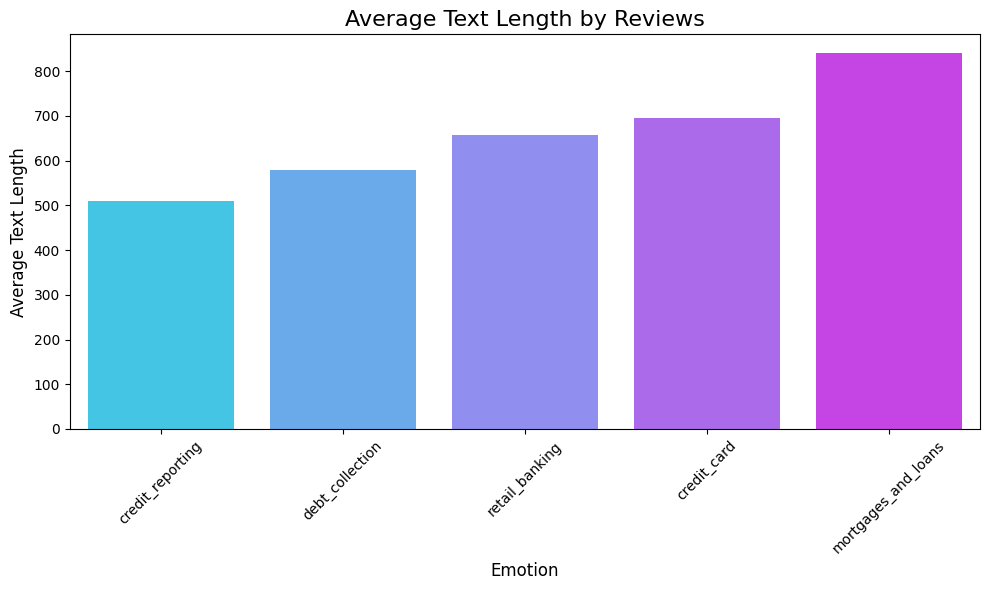

In [ ]:
# Visualizing Average Text Length by Reviews

avg_text_length = df_dv.groupby('Label')['Text_Length'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_text_length.index, y=avg_text_length.values, palette='cool')
plt.title('Average Text Length by Reviews', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Average Text Length', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

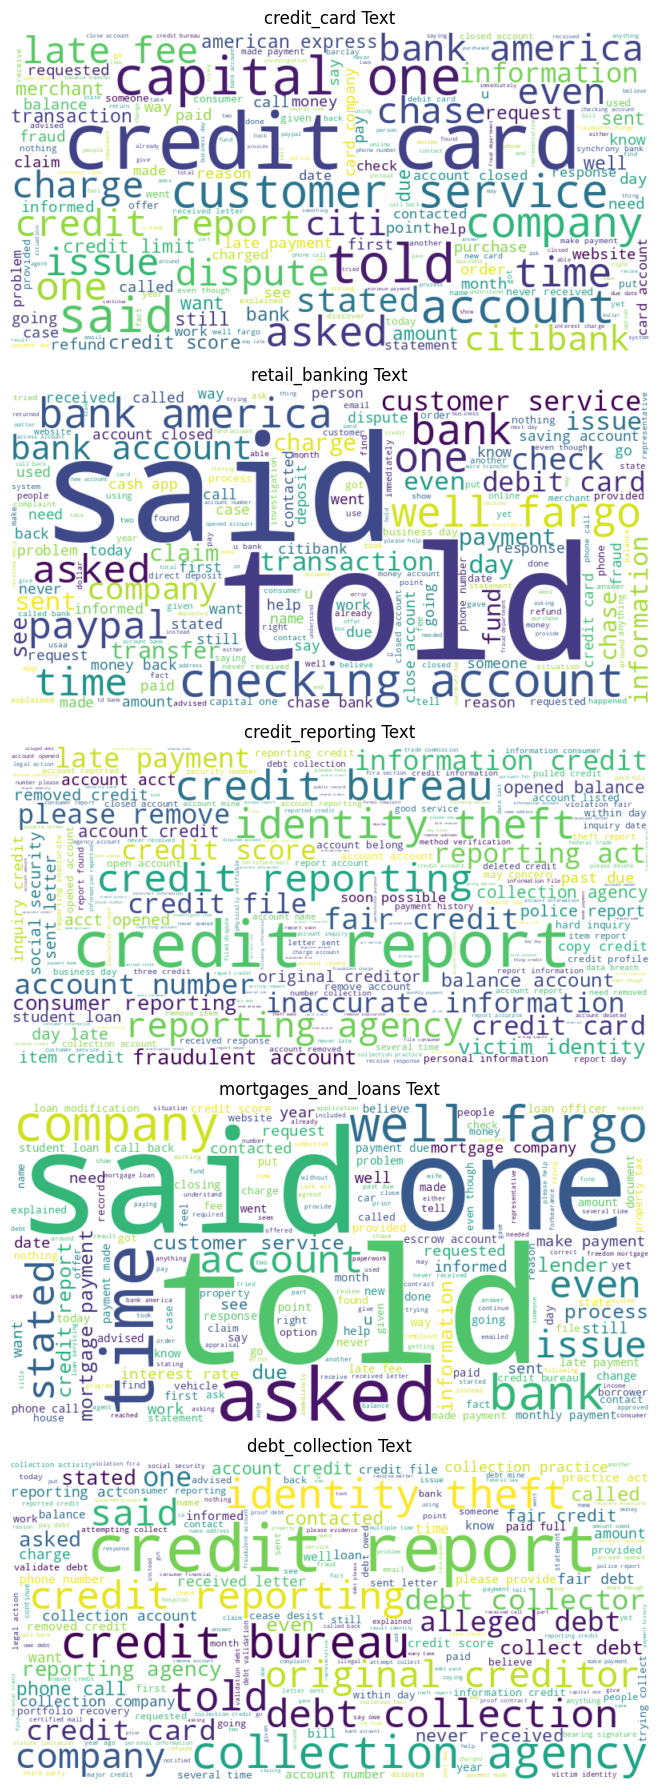

In [ ]:
# Creating WordCloud for all the lables

from wordcloud import WordCloud

emotion_dfs = {
    'credit_card': df_dv[df_dv['Label'] == 'credit_card'],
    'retail_banking': df_dv[df_dv['Label'] == 'retail_banking'],
    'credit_reporting': df_dv[df_dv['Label'] == 'credit_reporting'],
    'mortgages_and_loans': df_dv[df_dv['Label'] == 'mortgages_and_loans'],
    'debt_collection': df_dv[df_dv['Label'] == 'debt_collection'],
}

plt.figure(figsize=(10, 18))
for i, (emotion, subset) in enumerate(emotion_dfs.items(), 1):
    combined_text = ' '.join(subset['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.subplot(5, 1, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{emotion} Text')
    plt.axis('off')

plt.tight_layout()
plt.show()



## Data Cleaning & Preprocessing

In [5]:
import re
import nltk
import sklearn
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tensorflow.keras.utils import pad_sequences
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from transformers import BertTokenizer, TFBertForSequenceClassification

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Dropping Duplicated Rows

df.drop_duplicates(inplace=True)

In [8]:
# Dropping NA Values Rows

df.dropna(inplace=True)

In [9]:
# Dropping Unnamed Column

df.drop(columns=['Unnamed: 0'])

,product,narrative
0,credit_card,used barclaycard purchase something online imm...
1,mortgages_and_loans,complaint car title received waiting refund bo...
2,mortgages_and_loans,attorney short sale property complaining servi...
3,debt_collection,late payment mortgage never helped
4,credit_card,store card amazon thru synchrony bank went acc...
...,...,...
29995,debt_collection,sent letter seeking validation two debt collec...
29996,credit_card,called capitalone requested make transfer fund...
29997,credit_card,writing complaint report authorized charge acc...
29998,credit_reporting,transunion follow bankruptcy law allowed laten...


In [10]:
# Creating a pipeline for Data Cleaning

def clean_text_pipeline(df, text_column='statement'):
    stop = set(stopwords.words('english'))

    def clean_text(text):

        text = str(text)
        text = re.sub(r'http\S+|www\S+|@\S+', '', text)  # Removing URLs and email addresses
        text = re.sub(r'[^\w\s]', '', text)        # Removing special characters and punctuation
        text = re.sub(r'\s+', ' ', text)           # Removing extra whitespaces
        text = text.lower()                        # Lowercasing text
        return text

    df[text_column] = df[text_column].apply(clean_text)
    return df

In [11]:
# Data Cleaning

df = clean_text_pipeline(df, text_column='narrative')

In [12]:
# Train Test and Split

X = df['product']
y = df['narrative']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Load the BERT tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [14]:
# Tokenize the text

train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128, return_tensors='tf')

In [15]:
# Create a mapping from labels to numerical values

label_mapping = {
    'credit_card': 0,
    'retail_banking': 1,
    'credit_reporting': 2,
    'mortgages_and_loans': 3,
    'debt_collection': 4,
}

In [16]:
# Convert labels to numerical values using the mapping

y_train_numerical = y_train.map(label_mapping)
y_test_numerical = y_test.map(label_mapping)

In [17]:
# Convert labels to TensorFlow tensors with correct dtype

train_labels = tf.convert_to_tensor(y_train_numerical, dtype=tf.int32)
test_labels = tf.convert_to_tensor(y_test_numerical, dtype=tf.int32)


train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(32)

## Model Building

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

In [20]:
# Define the optimizer using AdamWeightDecay from transformers

from transformers.optimization_tf import AdamWeightDecay, create_optimizer

optimizer = AdamWeightDecay(learning_rate=5e-5)

In [21]:
# Compile the model

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [22]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0 (unused)
                                                                 
 classifier (Dense)          multiple                  3845      
                                                                 
Total params: 109486085 (417.66 MB)
Trainable params: 109486085 (417.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=3
)

## Model Evaluation

In [ ]:
history_df=pd.DataFrame(history.history)
history_df

In [ ]:
plt.figure(figsize=(15,5))

# plotting accuracy and val_accuracy
plt.subplot(1,2,1)
plt.plot(history_df['accuracy'],label='accuracy',c='red')
plt.plot(history_df['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('acc value')
plt.title('accuracy VS val_accuracy')
plt.legend()

# plotting loss and val_loss
plt.subplot(1,2,2)
plt.plot(history_df['loss'],label='loss',c='red')
plt.plot(history_df['val_loss'],label='val_loss')
plt.title('loss VS val_loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()

plt.show()